In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#библиотека для регулярных выражений
import re 

data = pd.read_csv('/home/mike/Documents/Coding/Data/wine.csv')
display(data.head())

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [174]:
data['taster_name'].nunique()

19

In [175]:
data['price'].max()

3300.0

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


array([[<AxesSubplot:title={'center':'points'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

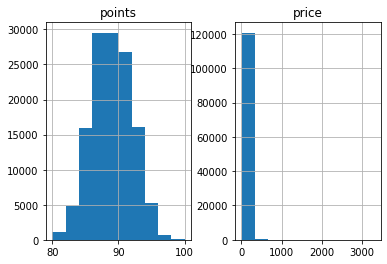

In [181]:
hist = data.hist()
hist

In [178]:
wine_data = data.copy()

In [182]:
duplicates = wine_data[wine_data.duplicated()]
print('Число дубликтов: {}'.format(duplicates.shape[0]))
wine_data = wine_data.drop_duplicates()
print('Результирующее число записей: {}'.format(wine_data.shape[0]))

Число дубликтов: 0
Результирующее число записей: 119988


In [183]:
null_data = wine_data.isnull().sum()
display(null_data[null_data > 0])

country                     59
designation              34545
price                     8395
province                    59
region_1                 19560
region_2                 73219
taster_name              24917
taster_twitter_handle    29446
variety                      1
dtype: int64

<AxesSubplot:>

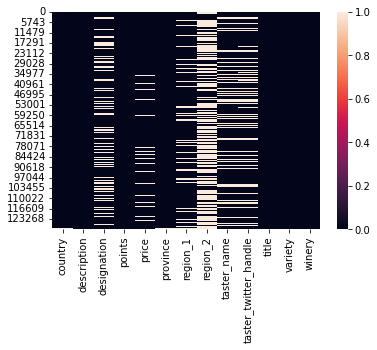

In [184]:
sns.heatmap(wine_data.isnull()) # наглядная карта пропусков

In [185]:
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = wine_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
wine_data = wine_data.dropna(how='any', thresh=thresh, axis=1)
#отображаем результирующую долю пропусков
wine_data.isnull().mean()

country                  0.000492
description              0.000000
designation              0.287904
points                   0.000000
price                    0.069965
province                 0.000492
region_1                 0.163016
taster_name              0.207662
taster_twitter_handle    0.245408
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64

In [186]:
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'country': 'unknown',
    'designation': 'unknown',
    'province': 'unknown',
    'region_1': 'unknown',
    'taster_name': 'unknown',
    'taster_twitter_handle': 'unknown',
    'variety': 'unknown',
    'price': wine_data['price'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
wine_data = wine_data.fillna(values)
#выводим результирующую долю пропусков
wine_data.isnull().mean()

country                  0.0
description              0.0
designation              0.0
points                   0.0
price                    0.0
province                 0.0
region_1                 0.0
taster_name              0.0
taster_twitter_handle    0.0
title                    0.0
variety                  0.0
winery                   0.0
dtype: float64

In [187]:
wine_data = wine_data.to_csv('/home/mike/Documents/Coding/Data/wine_data.csv')

PANDAS-PROFILING

Pandas-profiling — это библиотека с открытым исходным кодом, которая создаёт подробный отчёт по данным. Pandas-profiling можно легко использовать для больших наборов данных: отчёты создаются всего за несколько секунд.

In [143]:
pip install pandas-profiling

/bin/bash: line 1: /home/mike/anaconda3/envs/sf/bin/python: No such file or directory
Note: you may need to restart the kernel to use updated packages.


In [144]:
pip install ipywidgets

/bin/bash: line 1: /home/mike/anaconda3/envs/sf/bin/python: No such file or directory
Note: you may need to restart the kernel to use updated packages.


In [188]:
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv('/home/mike/Documents/Coding/Data/wine.csv')

In [189]:
profile = ProfileReport(df, title="Wine Pandas Profiling Report")
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


SWEETVIZ

Sweetviz — это библиотека автоматического анализа с открытым исходным кодом. Sweetviz также можно использовать для сравнения нескольких наборов данных и выводов по ним. 

In [ ]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import sweetviz as sv

data = pd.read_csv('/home/mike/Documents/Coding/Data/wine.csv')

In [190]:
report = sv.analyze(df)
report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


D-Tale

D-Tale — это библиотека, которая делает подробный разведывательный анализ набора данных. Библиотека предоставляет функцию экспорта кода для каждого графика или элемента анализа в отчёте.

In [ ]:
pip install dtale

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
import dtale

df = pd.read_csv('/home/mike/Documents/Coding/Data/wine.csv')

In [ ]:
d = dtale.show(df)
d

In [332]:
data = pd.read_csv('/home/mike/Documents/Coding/Data/wine_cleared.csv')
null_data = data.isnull().sum()
display(null_data[null_data > 0])

country     63
province    63
variety      1
dtype: int64

In [333]:
display(data.head())

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  
0              Nicosia  
1  Quinta dos Avidagos  
2            Rainstorm  
3           St. Julian  
4         Sweet Cheeks

In [334]:
display(data['price'].min())

4.0

In [ ]:
pip install statistics

Note: you may need to restart the kernel to use updated packages.


In [297]:
import statistics

In [335]:
display(round(statistics.mean(data['price']), 2))



35.36

In [195]:
display(data['price'].mean())

35.363389129985535

In [ ]:
display(round(statistics.median(data['price']), 2))

28.0

In [ ]:
display(data['price'].median())

28.0

In [ ]:
display(round(statistics.mode(data['price']), 2))

35.36

In [336]:
display(data['price'].mode())

0    35.363389
dtype: float64

In [298]:
display(data.corr())

Unnamed: 0    points     price
Unnamed: 0    1.000000  0.007124  0.004652
points        0.007124  1.000000  0.402137
price         0.004652  0.402137  1.000000

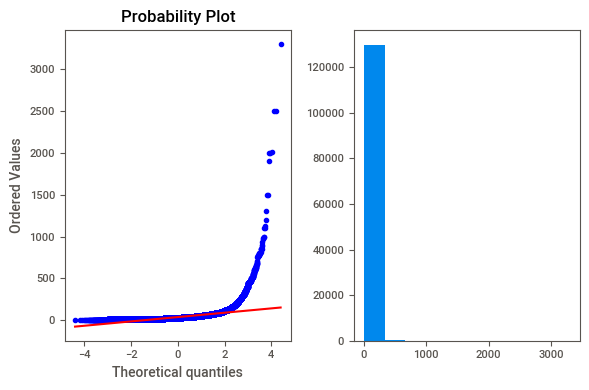

In [197]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

In [38]:
import numpy as np
from scipy import stats
import plotly.graph_objects as go

In [198]:

qq = stats.probplot(data['points'], dist='lognorm', sparams=(1))
x = np.array([qq[0][0][0], qq[0][0][-1]])

fig = go.Figure()
fig.add_scatter(x=qq[0][0], y=qq[0][1], mode='markers')
fig.add_scatter(x=x, y=qq[1][1] + qq[1][0]*x, mode='lines')
fig.layout.update(showlegend=False, height=500, width=500)

fig.show()

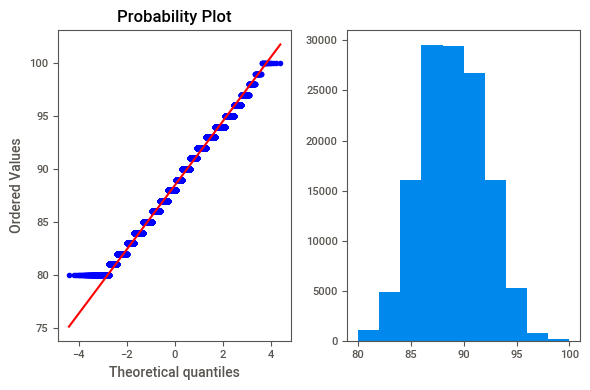

In [199]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

In [200]:
display(data.corr(method='kendall'))

Unnamed: 0    points     price
Unnamed: 0    1.000000  0.006536  0.002533
points        0.006536  1.000000  0.433498
price         0.002533  0.433498  1.000000

In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.metrics import matthews_corrcoef

In [42]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

In [43]:
df = pd.read_csv('/home/mike/Documents/Coding/Data/model.csv')
display(df.head())

Month  Year      Waist       Hips     Height      Weight        BMI  \
0  December  1953  24.000000  36.000000  65.000000  118.000000  19.630000   
1   January  1954  23.433172  34.698708  66.057258  114.936066  18.232168   
2  February  1954  23.433172  34.698708  66.057258  114.936066  18.232168   
3     March  1954  24.000000  35.000000  66.000000  118.000000  19.040000   
4     April  1954  23.433172  34.698708  66.057258  114.936066  18.232168   

   Waist/Hip  
0   0.670000  
1   0.677916  
2   0.677916  
3   0.690000  
4   0.677916

In [44]:
display(df.corr())

Year     Waist      Hips    Height    Weight       BMI  \
Year       1.000000  0.292518 -0.281576  0.284482 -0.010753  0.025309   
Waist      0.292518  1.000000  0.283060  0.372637  0.452704  0.136549   
Hips      -0.281576  0.283060  1.000000  0.228054  0.541836  0.211395   
Height     0.284482  0.372637  0.228054  1.000000  0.706569 -0.037934   
Weight    -0.010753  0.452704  0.541836  0.706569  1.000000  0.212701   
BMI        0.025309  0.136549  0.211395 -0.037934  0.212701  1.000000   
Waist/Hip  0.458945  0.742284 -0.422412  0.198754  0.067543 -0.010173   

           Waist/Hip  
Year        0.458945  
Waist       0.742284  
Hips       -0.422412  
Height      0.198754  
Weight      0.067543  
BMI        -0.010173  
Waist/Hip   1.000000

In [45]:
import seaborn as sns


<AxesSubplot:>

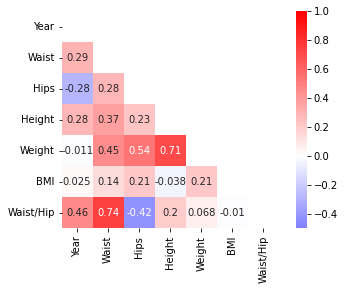

In [46]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot = True, fmt='.2g', vmin=-0.5, vmax=1, center= 0, cmap= 'bwr', square=True, mask=matrix)


<AxesSubplot:>

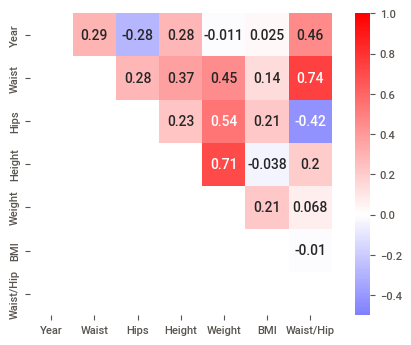

In [ ]:
matrix = np.tril(data.corr())
sns.heatmap(data.corr(), annot = True, fmt='.2g', vmin=-0.5, vmax=1, center= 0, cmap= 'bwr', square=True, mask=matrix)


<AxesSubplot:xlabel='Waist/Hip', ylabel='Waist'>

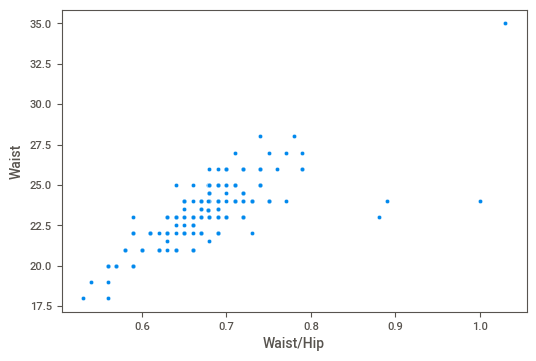

In [ ]:
sns.scatterplot(data=df, x="Waist/Hip", y="Waist")

<AxesSubplot:xlabel='Weight', ylabel='Year'>

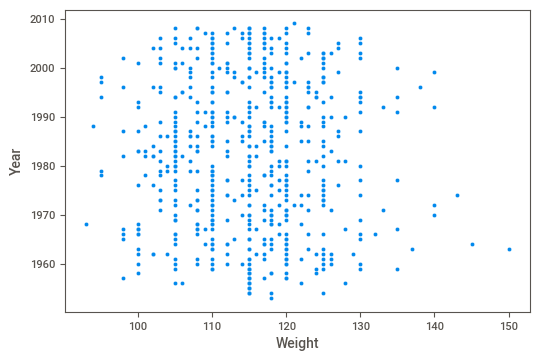

In [ ]:
sns.scatterplot(data=df, x="Weight", y="Year")

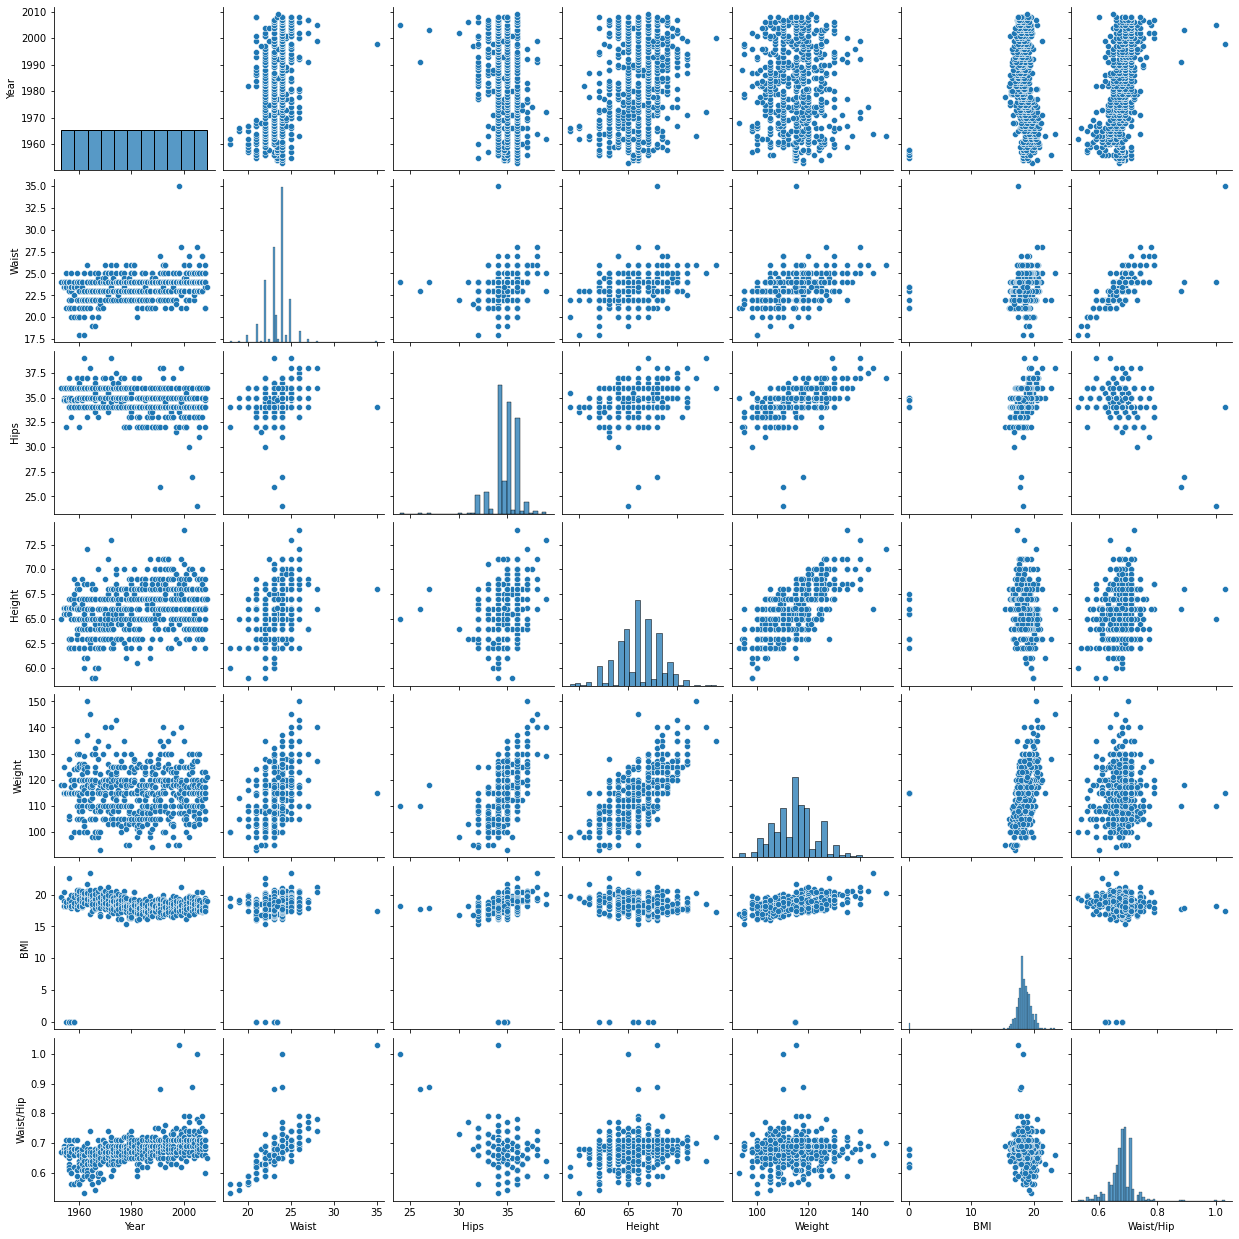

In [47]:
sns.pairplot(df)

In [337]:
import statistics
display(round(statistics.mean(df['Height']), 2))

KeyError: 'Height'

# Feature Engeneering #

In [344]:
display(data.head())

AttributeError: 'NoneType' object has no attribute 'head'

In [345]:
data = data.to_csv('/home/mike/Documents/Coding/Data/wine_cleared2.csv')

In [346]:
# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)

In [347]:
regex = '\d+' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

In [348]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [349]:
print(data['country'].value_counts())

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [350]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)


In [351]:
data['is_france'].sum()

22093

In [352]:
data['is_italy'].sum()

19540

In [353]:

#df['year'] = df['year'].astype('datetime')

data['year'] = pd.to_datetime(data['year'], errors='coerce')

display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129971 non-null  int64         
 1   Unnamed: 0.1           129971 non-null  int64         
 2   country                129908 non-null  object        
 3   description            129971 non-null  object        
 4   designation            129971 non-null  object        
 5   points                 129971 non-null  int64         
 6   price                  129971 non-null  float64       
 7   province               129908 non-null  object        
 8   region_1               129971 non-null  object        
 9   taster_name            129971 non-null  object        
 10  taster_twitter_handle  129971 non-null  object        
 11  title                  129971 non-null  object        
 12  variety                129970 non-null  obje

None

In [354]:
data['price_round'] = data['price'].round().astype(int)

In [358]:
#data = data.to_csv('/home/mike/Documents/Coding/Data/wine_cleared2.csv')
data = pd.read_csv('/home/mike/Documents/Coding/Data/wine_cleared2.csv')

In [359]:
# преобразуем признак year в объект datetime для удобного сравнения дат
data['year'] = pd.to_datetime(data['year'], errors='coerce')

# для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 
data['old_wine'].sum()



39594

In [360]:
import re

In [361]:
regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)

In [362]:
regex = '\d+' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

In [363]:
import pandas as pd
country_population = pd.read_csv('/home/mike/Documents/Coding/Data/country_population.csv', sep=';')

country_population

country     population
0               China  1,411,778,724
1               India  1,386,584,581
2                  US    333,022,386
3           Indonesia    271,350,000
4            Pakistan    225,200,000
..                ...            ...
236              Niue          1,549
237           Tokelau          1,501
238      Vatican City            825
239     Cocos Islands            573
240  Pitcairn Islands             40

[241 rows x 2 columns]

In [364]:
country_population[country_population.country == 'Italy']

country  population
24   Italy  59,097,904

In [365]:
import pandas as pd

data = data.join(country_population.set_index('country'), on='country')
data.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1   country  \
0           0             0               0     Italy   
1           1             1               1  Portugal   
2           2             2               2        US   
3           3             3               3        US   
4           4             4               4        US   

                                         description  \
0  Aromas include tropical fruit, broom, brimston...   
1  This is ripe and fruity, a wine that is smooth...   
2  Tart and snappy, the flavors of lime flesh and...   
3  Pineapple rind, lemon pith and orange blossom ...   
4  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1  ...         variety               winery price_round  \
0                 Etna  ...     White Blend              Nicosia          35   
1              unknown  ...  Portuguese Red  Quinta dos Avidagos          15   
2    Willamette Valley  ...      Pinot Gris            Rainstorm          14   
3  Lake Michigan Shore  ...        Riesling           St. Julian          13   
4    Willamette Valley  ...      Pinot Noir         Sweet Cheeks          65   

   year is_usa  is_france is_italy  old_wine             locality   population  
0  2013      0          0        1         0                 Etna   59,097,904  
1  2011      0          0        0         0                Douro   10,347,892  
2  2013      1          0        0         0    Willamette Valley  333,022,386  
3  2013      1          0        0         0  Lake Michigan Shore  333,022,386  
4  2012      1          0        0         0    Willamette Valley  333,022,386  

[5 rows x 23 columns]

In [366]:
area_country = pd.read_csv('/home/mike/Documents/Coding/Data/country_area.csv', sep=';')
area_country

country         area
0          Russia  17075400.00
1          Canada   9984670.00
2           China   9596960.00
3              US   9372610.00
4          Brazil   8547000.00
..            ...          ...
188    San Marino        61.00
189        Tuvalu        26.00
190         Nauru        21.00
191        Monaco         2.00
192  Vatican City         0.44

[193 rows x 2 columns]

In [367]:
data = data.join(area_country.set_index('country'), on='country')


In [368]:
data.area[data.title == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

94    9372610.0
Name: area, dtype: float64

In [370]:
#data = data.to_csv('/home/mike/Documents/Coding/Data/wine_cleared2.csv')
data = pd.read_csv('/home/mike/Documents/Coding/Data/wine_cleared2.csv')

In [371]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

client_id          agent_date          created_at            end_date
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32

In [372]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds

calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  
0         1  
1       231  
2       104  
3         2  
4       215  
5        95  
6        92  
7       215  
8        94  
9         6

In [373]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

In [374]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x > 10 else 0)
calls['is_connection'].sum()

7

In [375]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

In [376]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [377]:
import pandas as pd
data.year

0         2013.0
1         2011.0
2         2013.0
3         2013.0
4         2012.0
           ...  
129967    2013.0
129968    2004.0
129969    2013.0
129970    2012.0
129971    2012.0
Name: year, Length: 129972, dtype: float64

In [378]:
data['year'] = pd.to_datetime(data['year'], errors='coerce')
data['years_diff'] = (pd.to_datetime('2022-01-12') - data['year']).dt.days
data['years_diff'].max()


19003.0

In [131]:
pip install category_encoders


     |████████████████████████████████| 82 kB 474 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [321]:
import category_encoders as ce

In [379]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing


size   type
0  xxs  dress
1  xxs  skirt
2   xs  dress
3    s  skirt
4    m  dress
5    l  shirt
6    s   coat
7    m   coat
8  xxl  shirt
9    l  dress

In [380]:
# в классе OrdinalEncoder по умолчанию все строковые столбцы будут закодированы
ord_encoder = ce.OrdinalEncoder() 
# Метод fit_transform устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними
data_bin = ord_encoder.fit_transform(clothing[['size', 'type']])
# метод concat() для добавления закодированного признака в датафрейм data
clothing = pd.concat([clothing, data_bin], axis=1) 
# отображаем итог
clothing

size   type  size  type
0   xxs  dress     1     1
1   xxs  skirt     1     2
2    xs  dress     2     1
3     s  skirt     3     2
4     m  dress     4     1
5     l  shirt     5     3
6     s   coat     3     4
7     m   coat     4     4
8   xxl  shirt     6     3
9     l  dress     5     1

In [322]:
import category_encoders as ce

In [381]:
ord_encoder = ce.OrdinalEncoder(cols=['year'])
year_col = ord_encoder.fit_transform(data['year'])
data = pd.concat([data, year_col], axis=1)

In [382]:
data.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1   country  \
0           0             0               0                 0     Italy   
1           1             1               1                 1  Portugal   
2           2             2               2                 2        US   
3           3             3               3                 3        US   
4           4             4               4                 4        US   

                                         description  \
0  Aromas include tropical fruit, broom, brimston...   
1  This is ripe and fruity, a wine that is smooth...   
2  Tart and snappy, the flavors of lime flesh and...   
3  Pineapple rind, lemon pith and orange blossom ...   
4  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

   ...                          year is_usa is_france is_italy old_wine  \
0  ... 1970-01-01 00:00:00.000002013      0         0        1        0   
1  ... 1970-01-01 00:00:00.000002011      0         0        0        0   
2  ... 1970-01-01 00:00:00.000002013      1         0        0        0   
3  ... 1970-01-01 00:00:00.000002013      1         0        0        0   
4  ... 1970-01-01 00:00:00.000002012      1         0        0        0   

              locality   population       area  years_diff  year  
0                 Etna   59,097,904   301230.0     19003.0     1  
1                Douro   10,347,892    92391.0     19003.0     2  
2    Willamette Valley  333,022,386  9372610.0     19003.0     1  
3  Lake Michigan Shore  333,022,386  9372610.0     19003.0     1  
4    Willamette Valley  333,022,386  9372610.0     19003.0     3  

[5 rows x 27 columns]

In [325]:
import category_encoders as ce # импорт для работы с кодировщиком



In [383]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

size   type
0  xxs  dress
1  xxs  skirt
2   xs  dress
3    s  skirt
4    m  dress
5    l  shirt
6    s   coat
7    m   coat
8  xxl  shirt
9    l  dress

In [384]:

encoder = ce.OneHotEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

size   type  type_1  type_2  type_3  type_4
0  xxs  dress       1       0       0       0
1  xxs  skirt       0       1       0       0
2   xs  dress       1       0       0       0
3    s  skirt       0       1       0       0
4    m  dress       1       0       0       0
5    l  shirt       0       0       1       0
6    s   coat       0       0       0       1
7    m   coat       0       0       0       1
8  xxl  shirt       0       0       1       0
9    l  dress       1       0       0       0

In [385]:
data.shape[1]

27

In [386]:
encoder = ce.OneHotEncoder(cols=['taster_name']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['taster_name'])
data = pd.concat([df, type_bin], axis=1)

In [387]:
data.shape[1]

24

In [388]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

size   type
0  xxs  dress
1  xxs  skirt
2   xs  dress
3    s  skirt
4    m  dress
5    l  shirt
6    s   coat
7    m   coat
8  xxl  shirt
9    l  dress

In [389]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

size   type  type_0  type_1  type_2
0  xxs  dress       0       0       1
1  xxs  skirt       0       1       0
2   xs  dress       0       0       1
3    s  skirt       0       1       0
4    m  dress       0       0       1
5    l  shirt       0       1       1
6    s   coat       1       0       0
7    m   coat       1       0       0
8  xxl  shirt       0       1       1
9    l  dress       0       0       1

In [390]:
data.head()

beta  exponential   normal_p   normal_l  taster_name_1  taster_name_2  \
0  39.273740     2.263890  11.860245   4.748207              1              0   
1  55.030395    13.108592  11.796582  10.959172              0              1   
2  47.434682     3.312019  11.146945   3.919227              0              0   
3  43.173536    17.664301   8.266689  42.072915              0              0   
4  45.681443     2.109760   5.112983  16.960664              0              0   

   taster_name_3  taster_name_4  taster_name_5  taster_name_6  ...  \
0              0              0              0              0  ...   
1              0              0              0              0  ...   
2              1              0              0              0  ...   
3              0              1              0              0  ...   
4              1              0              0              0  ...   

   taster_name_11  taster_name_12  taster_name_13  taster_name_14  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   taster_name_15  taster_name_16  taster_name_17  taster_name_18  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   taster_name_19  taster_name_20  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0  

[5 rows x 24 columns]

In [392]:
#data = data.to_csv('/home/mike/Documents/Coding/Data/wine_cleared2.csv')
data = pd.read_csv('/home/mike/Documents/Coding/Data/wine_cleared2.csv')

In [393]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
data = pd.concat([df, type_bin], axis=1)

KeyError: 'country'

In [394]:
data.shape[1]

25

In [395]:
encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])
type_bin = encoder.fit_transform(data['taster_twitter_handle'])
data = pd.concat([df, type_bin], axis=1)

KeyError: 'taster_twitter_handle'

In [250]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

In [251]:
df

product  price payment_type
0  Product1   1200   Mastercard
1  Product2   3600         Visa
2  Product3   7500         Amex

In [252]:
encoder = ce.OneHotEncoder(cols=['product','payment_type'])
cols = encoder.fit_transform(df[['product','payment_type']])
df = pd.concat([df, cols], axis=1)

In [396]:
df.head()

beta  exponential   normal_p   normal_l
0  39.273740     2.263890  11.860245   4.748207
1  55.030395    13.108592  11.796582  10.959172
2  47.434682     3.312019  11.146945   3.919227
3  43.173536    17.664301   8.266689  42.072915
4  45.681443     2.109760   5.112983  16.960664

In [254]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

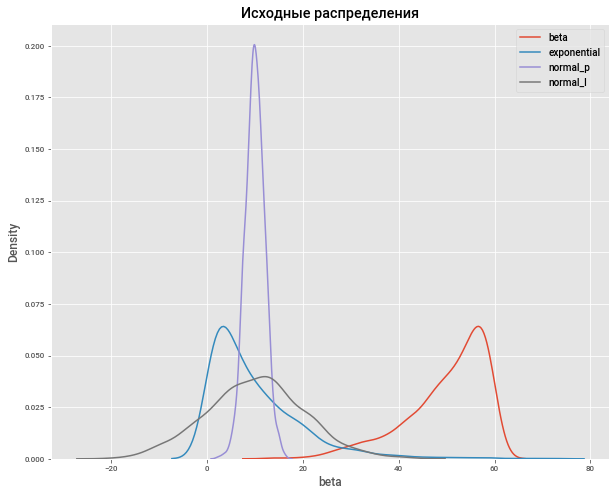

In [255]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [256]:
df.describe()

beta  exponential     normal_p     normal_l
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     50.024249    10.028387     9.994006    10.175745
std       8.474545     9.733928     2.013971    10.104004
min      13.854022     0.007617     2.356844   -19.539980
25%      45.793283     2.951421     8.687478     3.566822
50%      52.337504     7.018565     9.983498    10.326331
75%      56.722191    14.022485    11.306914    16.615057
max      59.990640    71.344341    16.214364    42.072915

<AxesSubplot:title={'center':'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

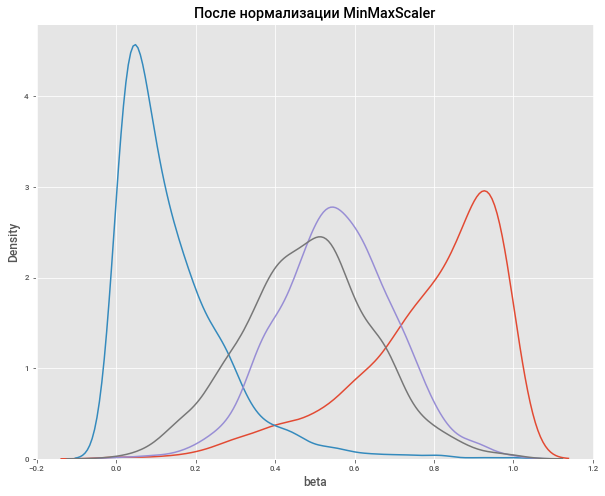

In [257]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

In [259]:
df_mm.describe()

beta  exponential     normal_p     normal_l
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.783981     0.140471     0.551120     0.482297
std       0.183684     0.136450     0.145334     0.163992
min       0.000000     0.000000     0.000000     0.000000
25%       0.692276     0.041266     0.456837     0.375032
50%       0.834120     0.098280     0.550362     0.484741
75%       0.929157     0.196461     0.645864     0.586810
max       1.000000     1.000000     1.000000     1.000000

<AxesSubplot:title={'center':'Рапсределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

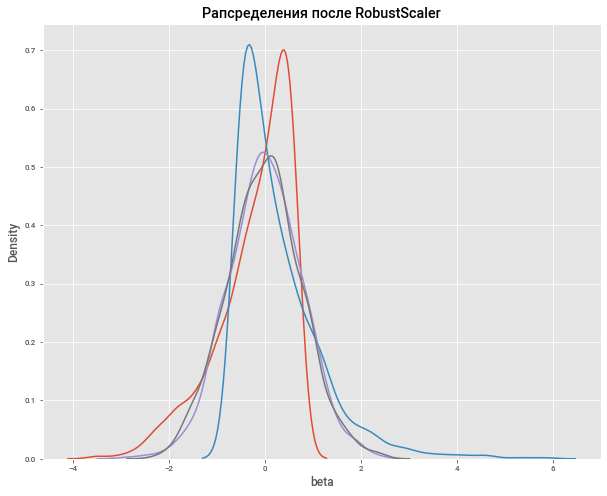

In [260]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Рапсределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

<AxesSubplot:title={'center':'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

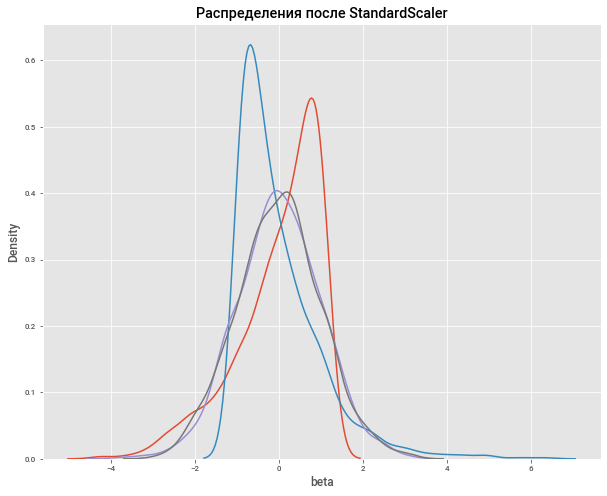

In [261]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [397]:

r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(pd.DataFrame(data = data['price']))
df_r = pd.DataFrame(df_r, columns=col_names)



KeyError: 'price'

In [283]:
s_scaler = preprocessing.StandardScaler()
# копируем исходный датасет
df_s = s_scaler.fit_transform(pd.DataFrame(data['price']))
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

ValueError: Shape of passed values is (129972, 1), indices imply (129972, 4)

# Отбор признаков

In [285]:
import pandas as pd

iris = pd.read_csv('/home/mike/Documents/Coding/Data/iris.csv')
iris.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

<AxesSubplot:>

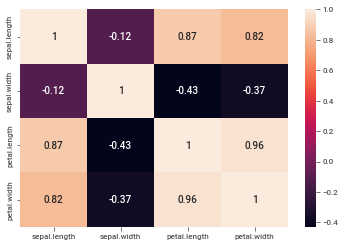

In [286]:
import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(iris.corr(), annot=True) # включаем отображение коэффициентов

In [287]:
iris = iris.drop(['petal.width'], axis=1)
iris = iris.drop(['petal.length'], axis=1)

In [289]:
iris

sepal.length  sepal.width    variety
0             5.1          3.5     Setosa
1             4.9          3.0     Setosa
2             4.7          3.2     Setosa
3             4.6          3.1     Setosa
4             5.0          3.6     Setosa
..            ...          ...        ...
145           6.7          3.0  Virginica
146           6.3          2.5  Virginica
147           6.5          3.0  Virginica
148           6.2          3.4  Virginica
149           5.9          3.0  Virginica

[150 rows x 3 columns]

<AxesSubplot:>

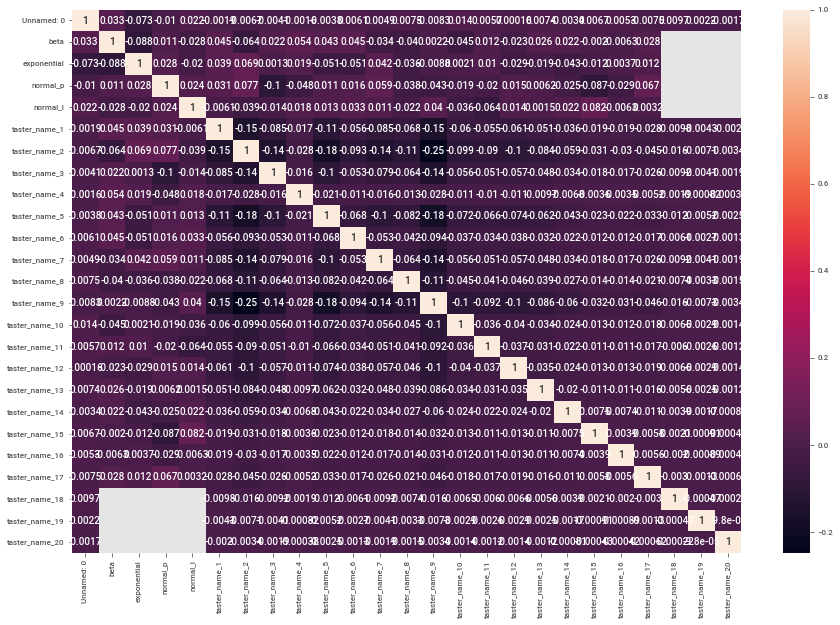

In [398]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, ax=ax)

# Самопроверка

In [3]:
#data = data.to_csv('/home/mike/Documents/Coding/Data/wine_cleared2.csv')
heart = pd.read_csv('/home/mike/Documents/Coding/Data/heart.csv')
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)

In [6]:
heart['old'].sum()

79

In [7]:
def set_avg_trestbps(x):
    if x['sex'] == 1:
        if x['age'] == 20:
            return 123
        if 20 < x['age'] <= 30:
            return 126
        if 30 < x['age'] <= 40:
            return 129
        if 40 < x['age'] <= 50:
            return 135
        if 50 < x['age'] <= 60:
            return 142
        if x['age'] > 60:
            return 142
    if x['sex'] == 0:
        if x['age'] == 20:
            return 116
        if 20 < x['age'] <= 30:
            return 120
        if 30 < x['age'] <= 40:
            return 127
        if 40 < x['age'] <= 50:
            return 137
        if 50 < x['age'] <= 60:
            return 144
        if x['age'] > 60:
            return 169

heart['trestbps_mean'] = heart.apply(set_avg_trestbps, axis=1)

In [9]:
heart['trestbps_mean'][300]

142

In [10]:
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  old  trestbps_mean  
0   0     1       1    1            142  
1   0     2       1    0            129  
2   0     2       1    0            137  
3   0     2       1    0            142  
4   0     2       1    0            144

In [14]:
heart.shape

(303, 16)

In [16]:
import category_encoders as ce

In [17]:
encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal'])
cols = encoder.fit_transform(heart[['cp', 'restecg', 'slope', 'ca', 'thal']])
heart = pd.concat([heart, cols], axis=1)

In [32]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
 16  cp_1           303 non-null    int64  
 17  cp_2           303 non-null    int64  
 18  cp_3      

In [20]:
heart_norm = heart.copy()

In [21]:
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
col_names = list(heart.columns)

mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(heart_norm)
df_mm = pd.DataFrame(df_mm, columns=col_names)

In [48]:
df_mm['chol'].std()

0.11833504791764848

In [49]:
r_scaler = preprocessing.RobustScaler()
df_nr = r_scaler.fit_transform(heart)
df_nr = pd.DataFrame(df_nr, columns=col_names)

In [50]:
df_nr['chol'].std()

0.8162322990225203

In [52]:
display(df_nr.corr())

age       sex        cp  trestbps      chol       fbs  \
age            1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex           -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp            -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps       0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol           0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs            0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg       -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach       -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang          0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak        0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope         -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca             0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal           0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target        -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   
old            0.718028 -0.144941 -0.024753  0.180631  0.159388  0.026790   
trestbps_mean  0.688955 -0.505694 -0.033948  0.216801  0.273440  0.042188   
cp_1           0.047516  0.088043  0.565508  0.151343 -0.050589  0.055511   
cp_2          -0.059432 -0.116588  0.636283 -0.045107 -0.037918  0.083679   
cp_3          -0.147399 -0.041249  0.014240 -0.081851 -0.012750 -0.060649   
cp_4           0.138253  0.089621 -0.887256  0.021447  0.070684 -0.060190   
restecg_1      0.141398  0.036539 -0.058633  0.133249  0.166565  0.077405   
restecg_2     -0.160654 -0.011940  0.070575 -0.146576 -0.174394 -0.066344   
restecg_3      0.084621 -0.107689 -0.052423  0.058635  0.034615 -0.048305   
slope_1        0.030536  0.046183  0.008741  0.122384 -0.045340  0.105284   
slope_2       -0.192580 -0.014356  0.152040 -0.087472 -0.028054 -0.020255   
slope_3        0.177201 -0.009157 -0.156633  0.025207  0.051177 -0.033360   
ca_1          -0.350844 -0.122854  0.193087 -0.055011 -0.080600 -0.112548   
ca_2           0.226491 -0.020571 -0.171632  0.088386  0.059887  0.122080   
ca_3           0.179284  0.096673 -0.045686 -0.059485  0.018775 -0.014774   
ca_4           0.162243  0.066758 -0.107590  0.080109  0.098568  0.075867   
ca_5          -0.122378  0.088212  0.054436  0.019059 -0.095785  0.018754   
thal_1         0.063758  0.141135 -0.073254  0.076369 -0.093560  0.091351   
thal_2        -0.135891 -0.376365  0.266947 -0.140712 -0.004591 -0.086774   
thal_3         0.110752  0.321559 -0.237760  0.109573  0.059621  0.030953   
thal_4        -0.016779 -0.032093  0.002611 -0.016870 -0.057127  0.080568   

                restecg   thalach     exang   oldpeak  ...   slope_3  \
age           -0.116211 -0.398522  0.096801  0.210013  ...  0.177201   
sex           -0.058196 -0.044020  0.141664  0.096093  ... -0.009157   
cp             0.044421  0.295762 -0.394280 -0.149230  ... -0.156633   
trestbps      -0.114103 -0.046698  0.067616  0.193216  ...  0.025207   
chol          -0.151040 -0.009940  0.067023  0.053952  ...  0.051177   
fbs           -0.084189 -0.008567  0.025665  0.005747  ... -0.033360   
restecg        1.000000  0.044123 -0.070733 -0.058770  ... -0.087349   
thalach        0.044123  1.000000 -0.378812 -0.344187  ... -0.419627   
exang         -0.070733 -0.378812  1.000000  0.288223  ...  0.257687   
oldpeak       -0.058770 -0.344187  0.288223  1.000000  ...  0.310986   
slope          0.093045  0.386784 -0.257748 -0.577537  ... -0.601576   
ca            -0.072042 -0.213177  0.115739  0.222682  ...  0.141923   
thal          -0.011981 -0.096439  0.206754  0.210244  ...  0.120269   
target         0.137230  0.421741 -0.436757 -0.430696  ... -0.362053   
old           -0.067531 -0.271898  0.019043  0.159997  ...  0.128139   
trestbps_mean -0.016480 -0.205048 -0.025128  0.104307  ...  0.064985   
cp_1          -0.074654

<AxesSubplot:>

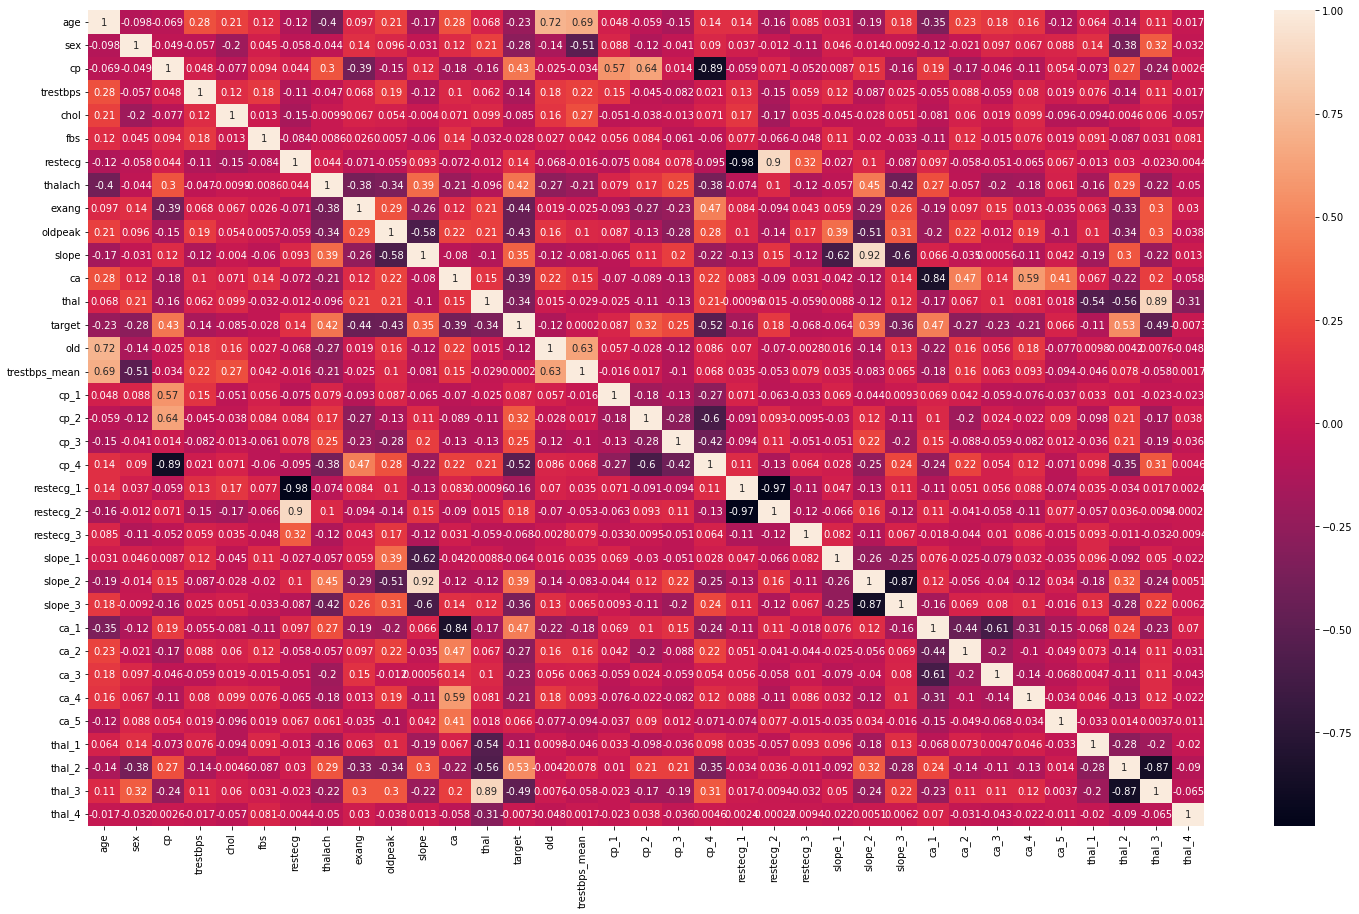

In [57]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df_nr.corr(), annot=True, ax=ax)